<a href="https://colab.research.google.com/github/philsaurabh/Machine-Learning-Tutorials/blob/main/LDA_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Machine-Learning-Tutorials/main/iris.csv')

In [3]:
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,target
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.columns

Index(['Unnamed: 0', 'sepal length', 'sepal width', 'petal length',
       'petal width', 'target'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


# Data Cleaning and Preprocessing

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.isnull().sum().sum()

0

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [12]:
df['target'] = df['target'].map({'Iris-setosa': 0, 'Iris-versicolor': 1,'Iris-virginica':2})
X = df.drop(columns = ['target'])
y = df['target'].values

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [15]:
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# SVM

In [18]:
from sklearn.model_selection import KFold

In [19]:
model = SVC()#KNeighborsClassifier()#SVC#RandomForestClassifier()#AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average="micro")
recall = recall_score(y_test, y_pred,average="micro")
cm = confusion_matrix(y_test, y_pred)
cv_score = cross_val_score(model, X_train, y_train, cv = 6)
kfold_validation=KFold(10)
k_fold =cross_val_score(model,X,y,cv=kfold_validation)
print ('Train score is', score)
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)
print ('--')
print ('CV score is', cv_score)
print(np.mean(cv_score))
print ('K fold score is', k_fold)
print(np.mean(k_fold))

Train score is 1.0
--
Precision score is  1.0
--
Recall Score is  1.0
--
Confusion Matrix

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
--
CV score is [0.95 1.   0.95 0.9  1.   0.95]
0.9583333333333334
K fold score is [1.         1.         1.         1.         0.93333333 0.86666667
 1.         0.86666667 0.86666667 0.93333333]
0.9466666666666667


# LDA

In [20]:
# Linear Discriminant Analysis
# Fit the model on the train data using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_pred = lda.fit(X_train, y_train).predict(X_test)

print(lda.means_)

# Find the accuracy of the test predictions vs the true classes
print("Training accuracy score: {:.3f}".format(lda.score(X_train,y_train)))
print("Test accuracy score: {:.3f}".format(lda.score(X_test,y_test)))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, lda_pred).T, index=model.classes_,columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, lda_pred))

[[-1.03396583  0.89321545 -1.31141791 -1.25710072]
 [ 0.0923043  -0.65549123  0.27454577  0.16208586]
 [ 0.83605831 -0.20209192  1.00188622  1.05353673]]
Training accuracy score: 0.975
Test accuracy score: 1.000

Confusion table:
 True        0  1   2
Predicted           
0          10  0   0
1           0  9   0
2           0  0  11

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Additional Tasks

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Machine-Learning-Tutorials/main/iris.csv')
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)
y=y.ravel()
lda = LDA(n_components=2)# <= min(n_classes - 1, n_features)=(min(1,something))
reduced_data = lda.fit(X,y).transform(X)
principalDf = pd.DataFrame(data = reduced_data, columns = ['PC-1','PC-2'])
# Adding lables
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
X_f = finalDf.drop(columns = ['target']).values
# Separating out the target
y_f = finalDf.loc[:,['target']].values

In [22]:
finalDf.head()

,PC-1,PC-2,target
0,8.084953,0.328454,Iris-setosa
1,7.147163,-0.755473,Iris-setosa
2,7.511378,-0.238078,Iris-setosa
3,6.837676,-0.642885,Iris-setosa
4,8.157814,0.540639,Iris-setosa


## Visualization

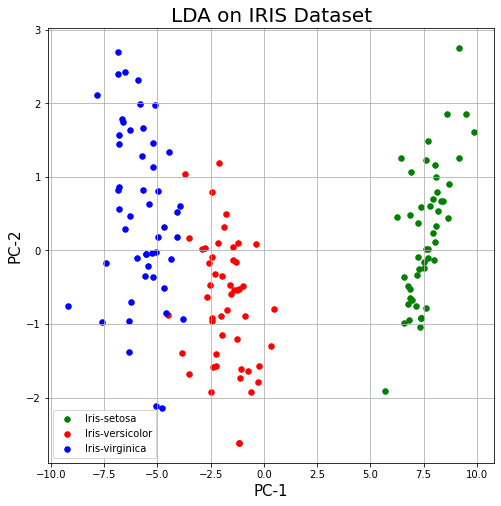

In [23]:

# Plotting pc1 & pc2
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('LDA on IRIS Dataset', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['g', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid()
plt.show()